# Alucar - Analisando as vendas 

## Pacotes

In [14]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


## Lendo Arquivos

In [2]:
alucar = pd.read_csv('dados/alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
print(f"Quantidade de linha e colunas: {alucar.shape}")

Quantidade de linha e colunas: (24, 2)


In [6]:
print(f"Qauntidade nulos: {alucar.isna().sum().sum()}")

Qauntidade nulos: 0


In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
alucar['mes'] = pd.to_datetime(alucar['mes'] )
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
alucar.head(2)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20


<AxesSubplot:xlabel='mes', ylabel='vendas'>

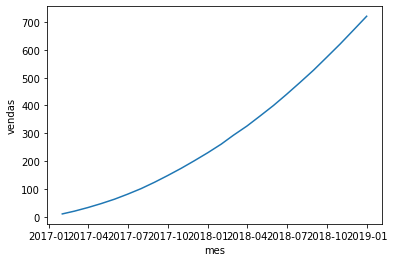

In [15]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

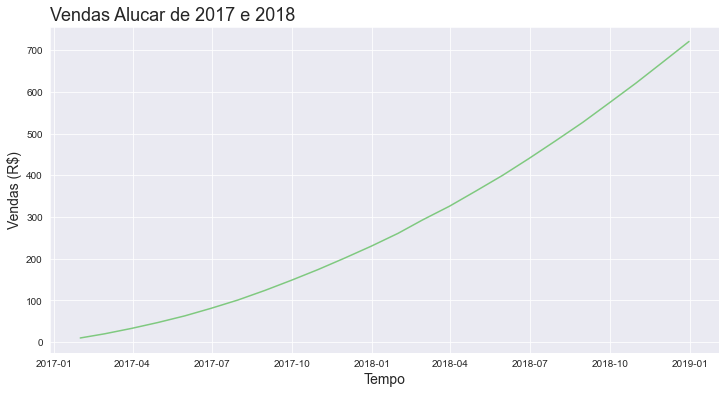

In [23]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax


In [25]:
# Decompondo preços
alucar['aumento'] = alucar['vendas'].diff()
alucar.head(3)

,mes,vendas,aumento_perc,aumento
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,10.0
2,2017-03-31,33,13.0,13.0


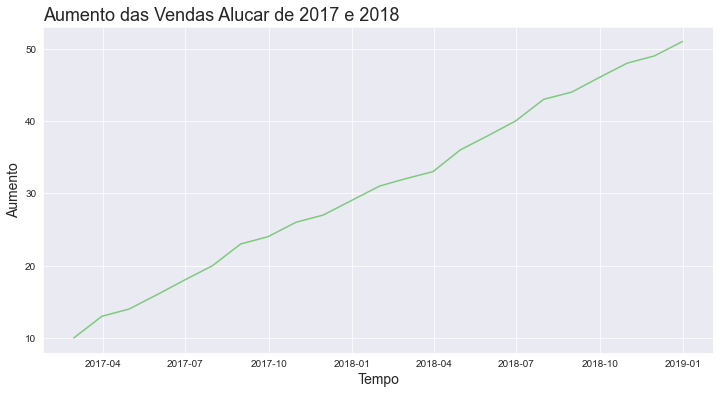

In [27]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [32]:
def plotar(titulo: str, labelx: str, labely: str, x: str, y: str, dataset: dict, fontt: int, fontlx: int, fontly: int) -> dict: 
    """Função para plotagem de gráfico"""
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=fontt)
    ax.set_xlabel(labelx, fontsize=fontlx)
    ax.set_ylabel(labely, fontsize=fontly)
    ax = ax
    return ax


<AxesSubplot:title={'left':'Aumento das Vendas Alucar de 2017 e 2018'}, xlabel='Tempo', ylabel='Aumento'>

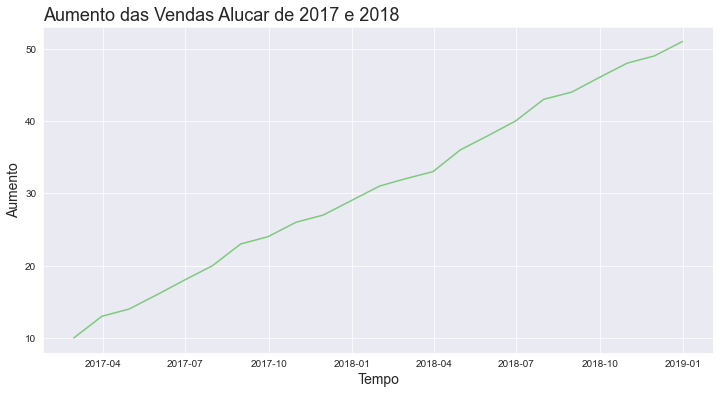

In [34]:
plotar(
    titulo='Aumento das Vendas Alucar de 2017 e 2018', 
    labelx='Tempo', 
    labely='Aumento', 
    x='mes', 
    y='aumento', 
    dataset=alucar, 
    fontt=18, 
    fontlx=14, 
    fontly=14 )

In [35]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head(3)

,mes,vendas,aumento_perc,aumento,aceleracao
0,2017-01-31,10,NaN,NaN,NaN
1,2017-02-28,20,10.0,10.0,NaN
2,2017-03-31,33,13.0,13.0,3.0


<AxesSubplot:title={'left':'Aceleracao das Vendas Alucar de 2017 e 2018'}, xlabel='Tempo', ylabel='Aceleração'>

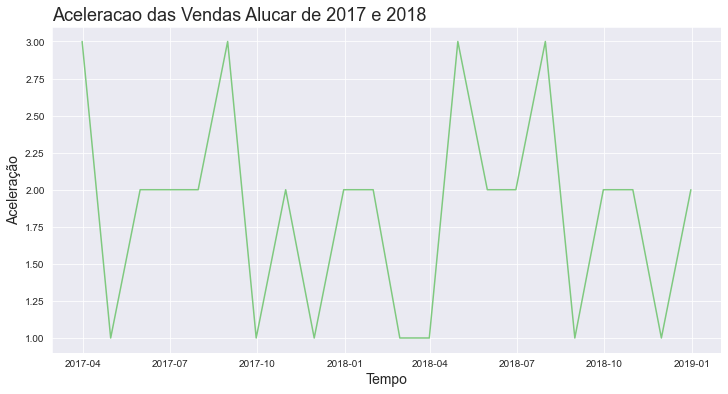

In [37]:
plotar(
    titulo='Aceleracao das Vendas Alucar de 2017 e 2018', 
    labelx='Tempo', 
    labely='Aceleração', 
    x='mes', 
    y='aceleracao', 
    dataset=alucar, 
    fontt=18, 
    fontlx=14, 
    fontly=14 )

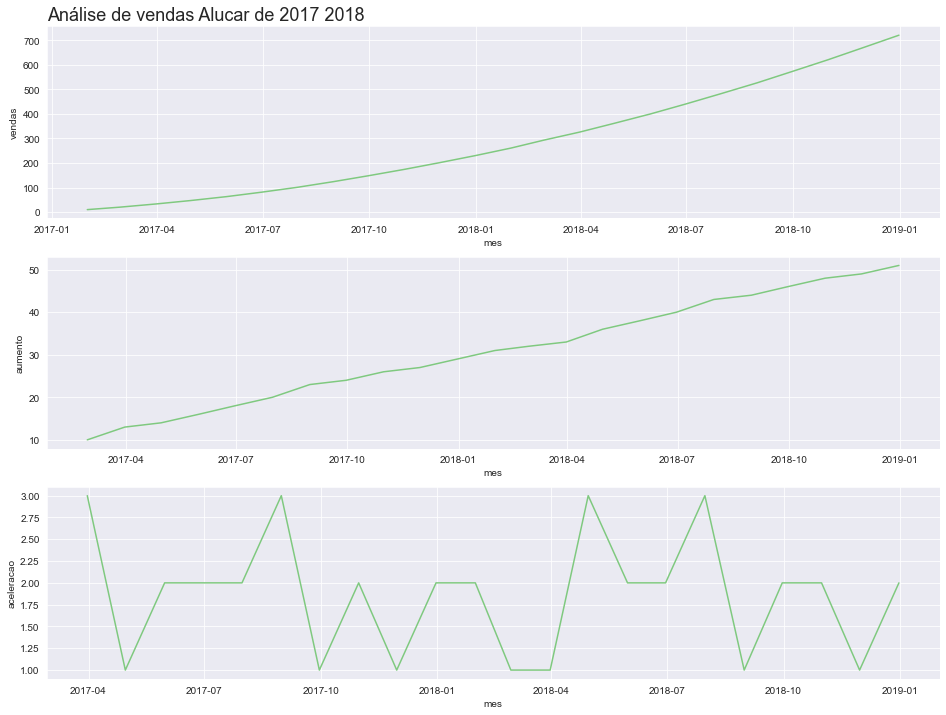

In [41]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas Alucar de 2017 2018', fontsize=18, loc='left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar) 
ax = plt.subplot(3,1,2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar) 
ax = plt.subplot(3,1,3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar) 
ax = ax

In [43]:
def plot_comparacao(x, y1,y2,y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x = x, y = y1, data = dataset) 
    ax = plt.subplot(3,1,2)
    sns.lineplot(x = x, y = y2, data = dataset) 
    ax = plt.subplot(3,1,3)
    sns.lineplot(x = x, y = y3, data = dataset) 
    ax = ax
    return ax

<AxesSubplot:xlabel='mes', ylabel='aceleracao'>

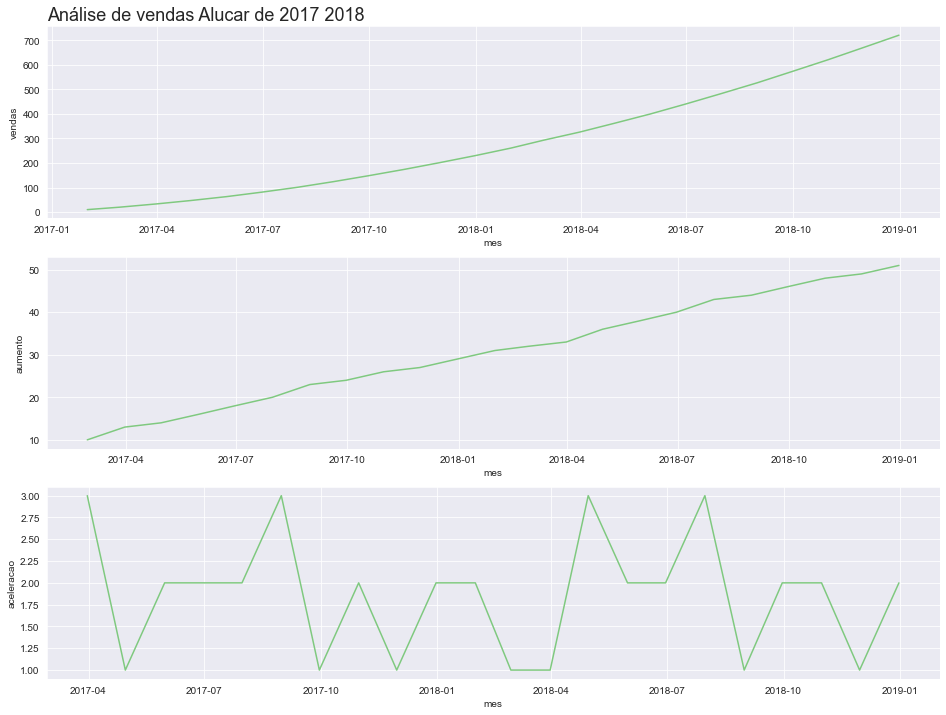

In [44]:
plot_comparacao(x='mes', y1='vendas', y2='aumento', y3='aceleracao', dataset=alucar, titulo='Análise de vendas Alucar de 2017 2018')

# Autocorrelação

In [45]:
from pandas.plotting import autocorrelation_plot

In [53]:
alucar.head(2)

,mes,vendas,aumento_perc,aumento,aceleracao
0,2017-01-31,10,NaN,NaN,NaN
1,2017-02-28,20,10.0,10.0,NaN


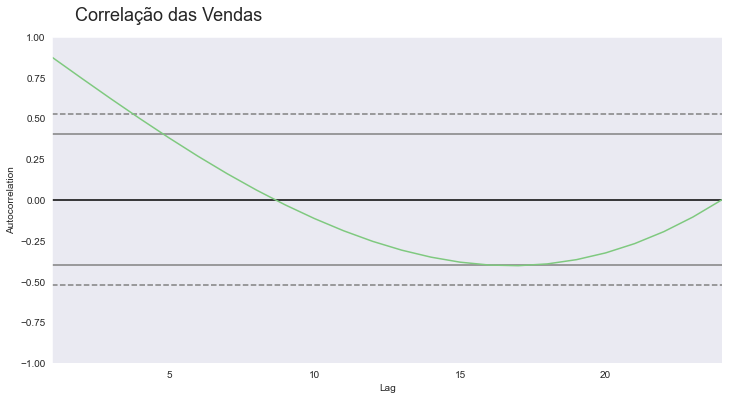

In [52]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

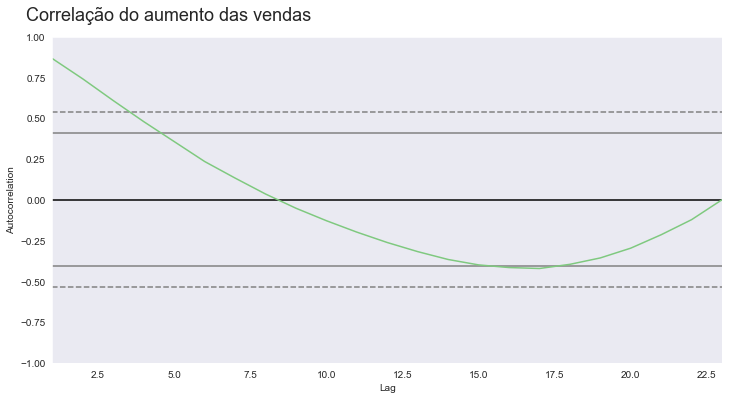

In [58]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

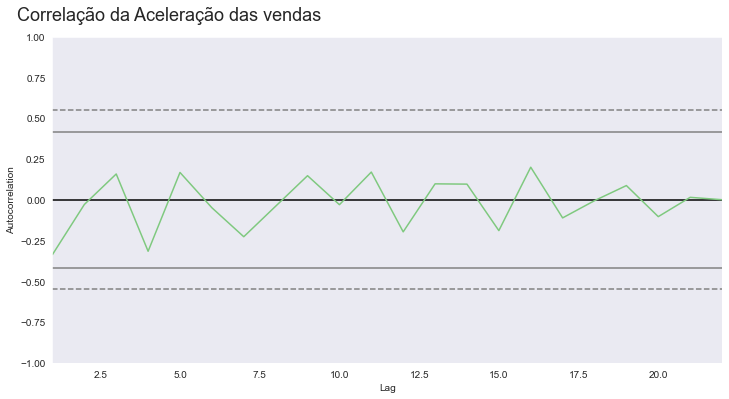

In [57]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

In [59]:
# Tabela de correlação:
autocorelacao = [ '1', '0,9 a 0,7', '0,7 a 0,4', '0,4 a 0,2', '0', '<0', '-1' ]
interpretacao =  [ 'correlação perfeita positiva', 'correlação forte', 'correlação moderada', 'correlação fraca', 'correlação nula', 'correlação negativa', 'correlação perfeita negativa' ]
data = {'Autocorrelação':autocorelacao,	'Interpretação':interpretacao}
tab_autocorr = pd.DataFrame(data=data)
tab_autocorr

,Autocorrelação,Interpretação
0,1,correlação perfeita positiva
1,"0,9 a 0,7",correlação forte
2,"0,7 a 0,4",correlação moderada
3,"0,4 a 0,2",correlação fraca
4,0,correlação nula
5,<0,correlação negativa
6,-1,correlação perfeita negativa


Fonte: https://pt.wikipedia.org/wiki/Autocorrela%C3%A7%C3%A3o